# CS210 - Project My Film History Analysis

This project, conducted as part of the CS210 course at Sabancı University, explores fundamental data science techniques, encompassing data manipulation, statistical modeling, and visualization using Python.

Project has two part first part has exploratory data analysis and second part has simple machine learning.

In this project , my personal watching history analyzed and simple machine learning application developed to predict my imdb score. This way, I can predict whether I will like a movie before watching it.

# **First Part EDA:**

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [297]:
# the file path to your HTML file
current_directory = os.getcwd()
csv_file_path = "AllMovies.csv"

# change opening file as open file in the same
# Read the HTML content from the file with explicit encoding

df = pd.read_csv(csv_file_path)
columns_to_drop = ["Description", "Const","Position","Title Type","Created","Modified","Date Rated","Release Date"]
df = df.drop(columns=columns_to_drop, axis=1)
controlFlag = 0
df

,Title,URL,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Directors,Your Rating
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,9.3,142,1994,Drama,2844857,Frank Darabont,8
1,The Godfather,https://www.imdb.com/title/tt0068646/,9.2,175,1972,"Crime, Drama",1982069,Francis Ford Coppola,10
2,The Dark Knight,https://www.imdb.com/title/tt0468569/,9.0,152,2008,"Action, Crime, Drama, Thriller",2825811,Christopher Nolan,8
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/,9.0,202,1974,"Crime, Drama",1345311,Francis Ford Coppola,10
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,9.0,96,1957,"Crime, Drama",849245,Sidney Lumet,9
...,...,...,...,...,...,...,...,...,...
714,Twelve Monkeys,https://www.imdb.com/title/tt0114746/,8.0,129,1995,"Mystery, Sci-Fi, Thriller",641074,Terry Gilliam,6
715,Snowpiercer,https://www.imdb.com/title/tt1706620/,7.1,126,2013,"Action, Drama, Sci-Fi, Thriller",384235,Bong Joon Ho,5
716,Charlie and the Chocolate Factory,https://www.imdb.com/title/tt0367594/,6.7,115,2005,"Adventure, Comedy, Family, Fantasy, Musical",519598,Tim Burton,7
717,Interview with the Vampire: The Vampire Chroni...,https://www.imdb.com/title/tt0110148/,7.5,123,1994,"Drama, Fantasy, Horror",343324,Neil Jordan,7


##Exploring the Dataset

We can start deep-diving into the dataset.

In [298]:
#2pts - show the first 3 rows
df.head(10)

,Title,URL,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Directors,Your Rating
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,9.3,142,1994,Drama,2844857,Frank Darabont,8
1,The Godfather,https://www.imdb.com/title/tt0068646/,9.2,175,1972,"Crime, Drama",1982069,Francis Ford Coppola,10
2,The Dark Knight,https://www.imdb.com/title/tt0468569/,9.0,152,2008,"Action, Crime, Drama, Thriller",2825811,Christopher Nolan,8
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/,9.0,202,1974,"Crime, Drama",1345311,Francis Ford Coppola,10
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,9.0,96,1957,"Crime, Drama",849245,Sidney Lumet,9
5,Schindler's List,https://www.imdb.com/title/tt0108052/,9.0,195,1993,"Biography, Drama, History",1429050,Steven Spielberg,8
6,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/,9.0,201,2003,"Action, Adventure, Drama, Fantasy",1948715,Peter Jackson,9
7,Pulp Fiction,https://www.imdb.com/title/tt0110912/,8.9,154,1994,"Crime, Drama",2182995,Quentin Tarantino,7
8,The Lord of the Rings: The Fellowship of the Ring,https://www.imdb.com/title/tt0120737/,8.9,178,2001,"Action, Adventure, Drama, Fantasy",1975991,Peter Jackson,9
9,"Il buono, il brutto, il cattivo",https://www.imdb.com/title/tt0060196/,8.8,161,1966,"Adventure, Western",800531,Sergio Leone,8


In [299]:
#1pts - show the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           719 non-null    object 
 1   URL             719 non-null    object 
 2   IMDb Rating     719 non-null    float64
 3   Runtime (mins)  719 non-null    int64  
 4   Year            719 non-null    int64  
 5   Genres          719 non-null    object 
 6   Num Votes       719 non-null    int64  
 7   Directors       715 non-null    object 
 8   Your Rating     719 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 50.7+ KB


In [300]:
df.shape

(719, 9)

In [301]:
#2pts - give the statistical summary of numerical column
df.describe()

,IMDb Rating,Runtime (mins),Year,Num Votes,Your Rating
count,719.000000,719.000000,719.000000,7.190000e+02,719.000000
mean,7.206537,119.941586,2002.983310,4.586663e+05,5.805285
std,0.907044,26.139958,16.503895,4.076485e+05,1.320895
min,3.800000,4.000000,1902.000000,2.300000e+01,2.000000
25%,6.600000,101.000000,1999.000000,1.778090e+05,5.000000
50%,7.300000,118.000000,2007.000000,3.442040e+05,6.000000
75%,7.900000,135.500000,2013.000000,6.332890e+05,7.000000
max,9.300000,229.000000,2023.000000,2.844857e+06,10.000000


My imbd score for movies, we will predict this in machine learing part.
Distribution of my rating and imbd average

<Axes: >

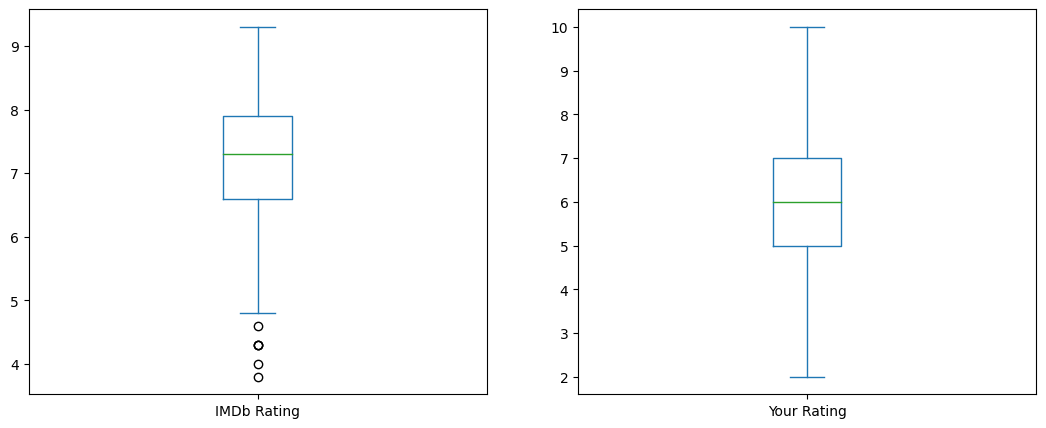

In [302]:
# distribution plots
fig, ax = plt.subplots(1, 2, figsize=(13,5))

#create boxplots for appropriate columns
df["IMDb Rating"].plot(kind="box", ax=ax[0])
df["Your Rating"].plot(kind="box", ax=ax[1])

Distribution of movie genres.

In [303]:
# Step 1: Create a new DataFrame for genre name and number of occurrences
genre_counts = pd.DataFrame(columns=['Genre', 'Occurrence'])

# Step 2: Read 'Genres' column from the original DataFrame
genres_series = df['Genres']

# Step 3: Split every genre and count occurrences
for genres in genres_series:
    genre_list = [genre.strip() for genre in genres.split(',')]
    for genre in genre_list:
        if genre:
            # Step 4: Add genre to the new DataFrame or increase occurrence
            if genre in genre_counts['Genre'].values:
                genre_counts.loc[genre_counts['Genre'] == genre, 'Occurrence'] += 1
            else:
                new_row = {'Genre': genre,
               'Occurrence':1}
                genre_counts.loc[len(genre_counts)] = new_row

# Display the new DataFrame with genre occurrences
genre_counts = genre_counts.sort_values(by='Occurrence', ascending=False)
genre_counts = genre_counts.reset_index(drop=True)
genre_counts

,Genre,Occurrence
0,Action,366
1,Adventure,358
2,Drama,283
3,Sci-Fi,259
4,Fantasy,205
5,Thriller,196
6,Comedy,183
7,Family,152
8,Animation,108
9,Crime,99


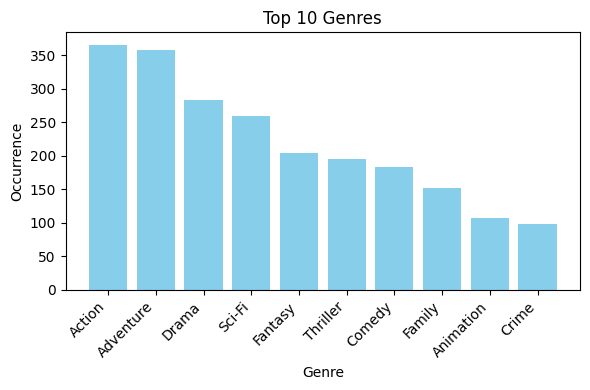

In [304]:
#5pts
# Take the top 10 genres
top_10_genres = genre_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(6, 4))
plt.bar(top_10_genres['Genre'], top_10_genres['Occurrence'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Occurrence')
plt.title('Top 10 Genres')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

I expected science fiction movies to be number one, but that's not the truth.

Distribution of directors, It is important data to understand movie prefence.

In [305]:
# Step 1: Create a new DataFrame for directors and the number of movies
directors = pd.DataFrame(columns=['Directors', 'NumMovies'])

# Step 2: Group by 'Director' and count the number of movies for each director
director_counts = df['Directors'].value_counts()

# Step 3: Populate the 'directors' DataFrame with director names and movie counts
for director, num_movies in director_counts.items():
    new_row = {'Directors':director,
               'NumMovies':num_movies}
    directors.loc[len(directors)] = new_row
# Display the 'directors' DataFrame

# Step 4: Split 'Directors' column into separate rows
directors_list = df['Directors'].str.split(', ').explode()

# Step 5: Create a new DataFrame for directors and the number of movies
directors = pd.DataFrame(columns=['Directors', 'NumMovies'])
director_counts = directors_list.value_counts()

# Step 6: Populate the 'directors' DataFrame with director names and movie counts
for director, num_movies in director_counts.items():
    new_row = {'Directors': director,
               'NumMovies': num_movies}
    directors.loc[len(directors)] = new_row
directors

,Directors,NumMovies
0,Steven Spielberg,18
1,Ridley Scott,11
2,Hayao Miyazaki,10
3,Christopher Nolan,10
4,Stanley Kubrick,9
...,...,...
430,Carl Rinsch,1
431,Katsuhiro Ôtomo,1
432,Mark Mylod,1
433,Delbert Mann,1


In [306]:
#2pts
print("Top 10 director:")
directors.head(10)

Top 10 director:


,Directors,NumMovies
0,Steven Spielberg,18
1,Ridley Scott,11
2,Hayao Miyazaki,10
3,Christopher Nolan,10
4,Stanley Kubrick,9
5,Martin Scorsese,8
6,Tim Burton,8
7,Peter Jackson,7
8,Quentin Tarantino,7
9,Robert Zemeckis,7


Those directors my favorite directors (Steven Spielberg,	Ridley Scott ,Christopher Nolan	,Hayao Miyazaki ,Martin Scorsese	,Stanley Kubrick) as I expected but Zack Snyder?

I have check Tim Burton movies because I would not except this high number.

In [307]:
# Assuming 'df' is your DataFrame
df['Directors'] = df['Directors'].astype(str)

# Assuming 'df' is your DataFrame
tim_burton_rows = df[df['Directors'].str.contains('Tim Burton', na=False)]

# Sort the rows according to the 'Year' column
tim_burton_rows_sorted = tim_burton_rows.sort_values(by='Year')

# Display the sorted rows with Tim Burton in the 'Directors' column
tim_burton_rows_sorted

,Title,URL,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Directors,Your Rating
374,Batman,https://www.imdb.com/title/tt0096895/,7.5,126,1989,"Action, Adventure",399794,Tim Burton,5
375,Edward Scissorhands,https://www.imdb.com/title/tt0099487/,7.9,105,1990,"Drama, Fantasy, Romance",518074,Tim Burton,5
548,Planet of the Apes,https://www.imdb.com/title/tt0133152/,5.7,120,2001,"Action, Adventure, Sci-Fi, Thriller",226983,Tim Burton,4
147,Big Fish,https://www.imdb.com/title/tt0319061/,8.0,125,2003,"Adventure, Drama, Fantasy, Romance",455643,Tim Burton,6
231,Corpse Bride,https://www.imdb.com/title/tt0121164/,7.4,77,2005,"Animation, Drama, Family, Fantasy, Musical, Ro...",295401,"Tim Burton, Mike Johnson",7
716,Charlie and the Chocolate Factory,https://www.imdb.com/title/tt0367594/,6.7,115,2005,"Adventure, Comedy, Family, Fantasy, Musical",519598,Tim Burton,7
504,Sweeney Todd: The Demon Barber of Fleet Street,https://www.imdb.com/title/tt0408236/,7.3,116,2007,"Drama, Horror, Musical, Thriller",383727,Tim Burton,5
455,Alice in Wonderland,https://www.imdb.com/title/tt1014759/,6.4,108,2010,"Adventure, Family, Fantasy, Mystery",436312,Tim Burton,5


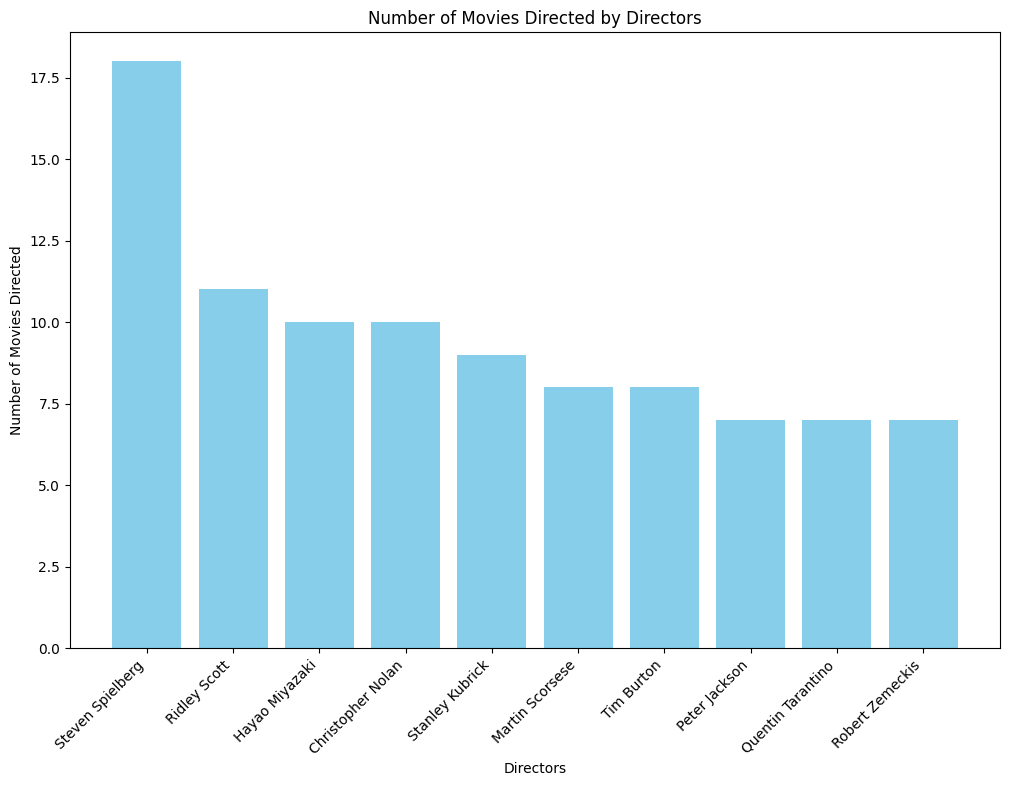

In [308]:
#6pts
# Plot the vertical bar chart
plt.figure(figsize=(12, 8))
plt.bar(directors['Directors'].head(10), directors['NumMovies'].head(10), color='skyblue')
plt.xlabel('Directors')
plt.ylabel('Number of Movies Directed')
plt.title('Number of Movies Directed by Directors')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

Distribution of release date , it is important to understand which period my movies produce.

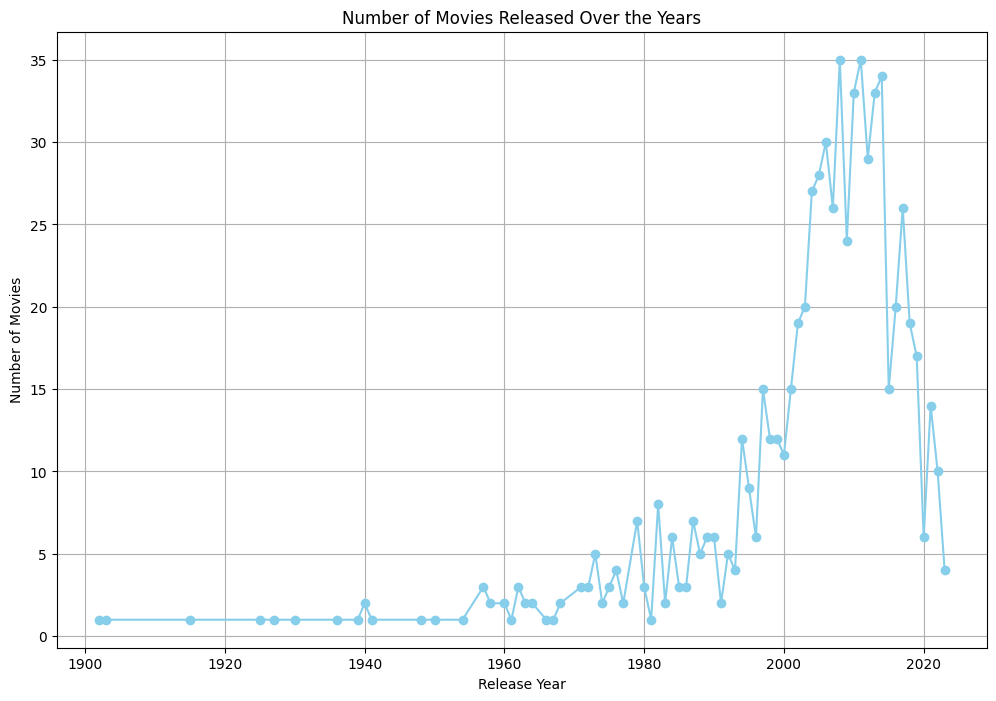

In [309]:
# Step 1: Extract release years and count occurrences
release_years_counts = df['Year'].value_counts().sort_index()

# Step 2: Plot the line graph
plt.figure(figsize=(12, 8))
plt.plot(release_years_counts.index, release_years_counts.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Over the Years')

# Show the plot
plt.grid(True)
plt.show()

How much time I have lost waching movies:

In [310]:
total_runtime = df['Runtime (mins)'].sum()

# Convert minutes to hours and days
total_runtime_hours = total_runtime / 60
total_runtime_days = total_runtime_hours / 24

# Print the information
print(f'Total runtime: {total_runtime} minutes')
print(f'Total runtime: {total_runtime_hours:.2f} hours')
print(f'Total runtime: {total_runtime_days:.2f} days')

Total runtime: 86238 minutes
Total runtime: 1437.30 hours
Total runtime: 59.89 days


# **Second Part Machine Learning:**

Fist new data frame for machine learning. Mapping numeric values to genres and directors

In [311]:
controlFlag = 0

In [312]:
if controlFlag == 0:

    # Step 1: Create a new DataFrame for machine learning
    ml_df = df.copy()

    # Increment the controlFlag to indicate the completion of this block
    controlFlag += 1

    # Step 5: Extract unique directors
    unique_directors = ml_df['Directors'].unique()

    # Step 6: Create a mapping dictionary for directors
    directors_map = {director: i + 1 for i, director in enumerate(unique_directors)}

    # Step 7: Map the 'Directors' column in the new DataFrame
    ml_df['Directors'] = ml_df['Directors'].map(directors_map)

# Display the resulting DataFrame
ml_df

,Title,URL,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Directors,Your Rating
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,9.3,142,1994,Drama,2844857,1,8
1,The Godfather,https://www.imdb.com/title/tt0068646/,9.2,175,1972,"Crime, Drama",1982069,2,10
2,The Dark Knight,https://www.imdb.com/title/tt0468569/,9.0,152,2008,"Action, Crime, Drama, Thriller",2825811,3,8
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/,9.0,202,1974,"Crime, Drama",1345311,2,10
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,9.0,96,1957,"Crime, Drama",849245,4,9
...,...,...,...,...,...,...,...,...,...
714,Twelve Monkeys,https://www.imdb.com/title/tt0114746/,8.0,129,1995,"Mystery, Sci-Fi, Thriller",641074,227,6
715,Snowpiercer,https://www.imdb.com/title/tt1706620/,7.1,126,2013,"Action, Drama, Sci-Fi, Thriller",384235,23,5
716,Charlie and the Chocolate Factory,https://www.imdb.com/title/tt0367594/,6.7,115,2005,"Adventure, Comedy, Family, Fantasy, Musical",519598,95,7
717,Interview with the Vampire: The Vampire Chroni...,https://www.imdb.com/title/tt0110148/,7.5,123,1994,"Drama, Fantasy, Horror",343324,399,7


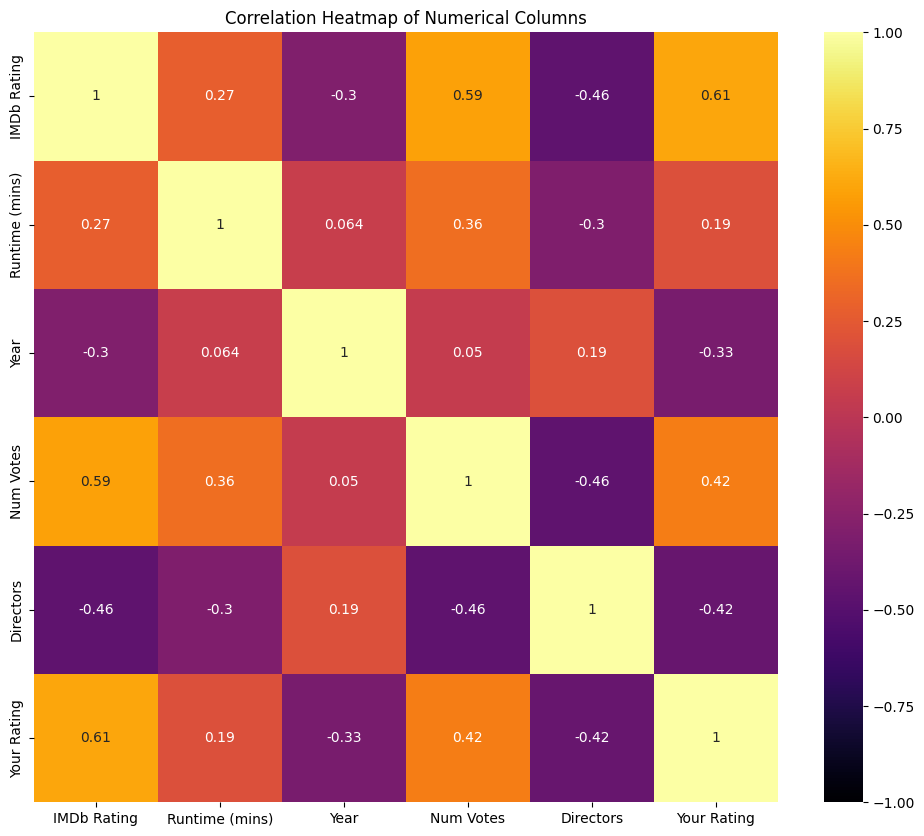

In [313]:
#4pts
# Ask about year and Month collums
numerical_columns = ml_df.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

Convert genres to numbers, Each genre to parameter.

In [314]:
if controlFlag == 1:
    # Step 1: Extract unique genres
    unique_genres = set(genre for genres in ml_df['Genres'] for genre in genres.split(', '))

    # Step 2: Add binary columns for each genre
    for genre in unique_genres:
        ml_df[genre] = 0

    # Step 3: Update the binary columns based on the 'Genres' column
    for index, row in ml_df.iterrows():
        genres = row['Genres'].split(', ')
        for genre in genres:
            ml_df.at[index, genre] += 1

    controlFlag += 1

    # Step 4: Identify non-numeric columns
    non_numeric_columns = ml_df.select_dtypes(exclude=['number']).columns

    # Step 5: Drop non-numeric columns from the DataFrame
    ml_df = ml_df.drop(columns=non_numeric_columns)

    # Step 6: Convert specific columns to 'float64'
    ml_df['Runtime (mins)'] = ml_df['Runtime (mins)'].astype('float64')
    ml_df['Year'] = ml_df['Year'].astype('int64')
    ml_df['Num Votes'] = ml_df['Num Votes'].astype('float64')
    ml_df['Directors'] = ml_df['Directors'].astype('float64')
    ml_df['Your Rating'] = ml_df['Your Rating'].astype('float64')

# Display the resulting DataFrame
ml_df

,IMDb Rating,Runtime (mins),Year,Num Votes,Directors,Your Rating,Musical,Crime,Comedy,War,...,Action,Fantasy,Family,Western,Thriller,Romance,Sci-Fi,Documentary,Mystery,Animation
0,9.3,142.0,1994,2844857.0,1.0,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.2,175.0,1972,1982069.0,2.0,10.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,152.0,2008,2825811.0,3.0,8.0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,9.0,202.0,1974,1345311.0,2.0,10.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,96.0,1957,849245.0,4.0,9.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,8.0,129.0,1995,641074.0,227.0,6.0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
715,7.1,126.0,2013,384235.0,23.0,5.0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
716,6.7,115.0,2005,519598.0,95.0,7.0,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
717,7.5,123.0,1994,343324.0,399.0,7.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [315]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
# Replace 'target_column' with the name of your target column
X = ml_df.drop(columns=['Your Rating']).reset_index(drop=True)
y = ml_df['Your Rating'].reset_index(drop=True)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMDb Rating     719 non-null    float64
 1   Runtime (mins)  719 non-null    float64
 2   Year            719 non-null    int64  
 3   Num Votes       719 non-null    float64
 4   Directors       719 non-null    float64
 5   Your Rating     719 non-null    float64
 6   Musical         719 non-null    int64  
 7   Crime           719 non-null    int64  
 8   Comedy          719 non-null    int64  
 9   War             719 non-null    int64  
 10  History         719 non-null    int64  
 11  Sport           719 non-null    int64  
 12  Biography       719 non-null    int64  
 13  Horror          719 non-null    int64  
 14  Adventure       719 non-null    int64  
 15  Music           719 non-null    int64  
 16  Short           719 non-null    int64  
 17  Drama           719 non-null    int

In [316]:
X

,IMDb Rating,Runtime (mins),Year,Num Votes,Directors,Musical,Crime,Comedy,War,History,...,Action,Fantasy,Family,Western,Thriller,Romance,Sci-Fi,Documentary,Mystery,Animation
0,9.3,142.0,1994,2844857.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.2,175.0,1972,1982069.0,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,152.0,2008,2825811.0,3.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,9.0,202.0,1974,1345311.0,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,96.0,1957,849245.0,4.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,8.0,129.0,1995,641074.0,227.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
715,7.1,126.0,2013,384235.0,23.0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
716,6.7,115.0,2005,519598.0,95.0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
717,7.5,123.0,1994,343324.0,399.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [317]:
x_train.reset_index(drop=True)

,IMDb Rating,Runtime (mins),Year,Num Votes,Directors,Musical,Crime,Comedy,War,History,...,Action,Fantasy,Family,Western,Thriller,Romance,Sci-Fi,Documentary,Mystery,Animation
0,5.9,123.0,2016,715801.0,161.0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
1,7.4,105.0,2011,605576.0,267.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,7.4,140.0,2017,277127.0,210.0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,7.4,129.0,2011,475837.0,52.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,6.9,124.0,2011,886874.0,215.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,8.3,119.0,1941,461150.0,47.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,8.1,98.0,1996,715278.0,61.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
536,7.8,139.0,2022,505526.0,173.0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
537,6.5,120.0,2005,531082.0,167.0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [318]:
x_test.reset_index(drop=True)

,IMDb Rating,Runtime (mins),Year,Num Votes,Directors,Musical,Crime,Comedy,War,History,...,Action,Fantasy,Family,Western,Thriller,Romance,Sci-Fi,Documentary,Mystery,Animation
0,8.1,120.0,1976,619524.0,75.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.4,121.0,2002,866533.0,107.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,8.5,117.0,1979,935772.0,24.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,6.7,118.0,2017,341183.0,317.0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4,7.6,92.0,2008,508570.0,124.0,0,0,1,0,0,...,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,7.8,104.0,2017,678963.0,236.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
176,7.7,129.0,2014,706701.0,162.0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
177,6.8,112.0,2013,717185.0,217.0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
178,5.4,98.0,2002,87939.0,272.0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [319]:
y_train.reset_index(drop=True)

0      5.0
1      6.0
2      5.0
3      6.0
4      7.0
      ... 
534    7.0
535    8.0
536    7.0
537    6.0
538    8.0
Name: Your Rating, Length: 539, dtype: float64

In [320]:
y_test.reset_index(drop=True)

0      7.0
1      8.0
2      9.0
3      4.0
4      6.0
      ... 
175    6.0
176    5.0
177    4.0
178    5.0
179    7.0
Name: Your Rating, Length: 180, dtype: float64

In [321]:
# Calculate correlations excluding 'health_metrics'
correlations = ml_df.drop(columns=['Your Rating']).corrwith(ml_df['Your Rating']).sort_values(ascending=False)

# Display correlations with the target variable
print("Correlations with my rating:")
print(correlations)

# Select a subset of features based on correlations
# Select the top 3 features with the highest absolute correlations
selected_features = correlations.abs().nlargest(3).index.tolist()

# Display selected features
print("\nTop 3 Features with Highly Correlated with my rating:")
selected_features

Correlations with my rating:
IMDb Rating       0.606358
Num Votes         0.424057
Drama             0.289228
Runtime (mins)    0.194820
War               0.123881
Biography         0.081670
History           0.077281
Mystery           0.070004
Music             0.051290
Crime             0.025309
Musical           0.010743
Western           0.009802
Horror            0.009710
Animation         0.005985
Thriller         -0.013809
Romance          -0.024339
Short            -0.031465
Documentary      -0.032221
Sport            -0.044623
Sci-Fi           -0.045146
Family           -0.062975
Comedy           -0.109741
Fantasy          -0.109886
Adventure        -0.192385
Action           -0.254470
Year             -0.329749
Directors        -0.421858
dtype: float64

Top 3 Features with Highly Correlated with my rating:


['IMDb Rating', 'Num Votes', 'Directors']

In [322]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Assuming 'ml_df' is your DataFrame
features = ml_df.columns.drop(['Your Rating'])

param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid,
    cv=5,  # Use 5-fold cross-validation
    scoring='accuracy',  # Choose an appropriate scoring metric
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model on the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [323]:
best_params

{'max_depth': 20, 'min_samples_split': 2}

In [324]:
best_model

DecisionTreeClassifier(max_depth=20)

In [325]:
# code here
modified_dt_classifier = DecisionTreeClassifier(max_depth =20, min_samples_split= 2)
modified_dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20)

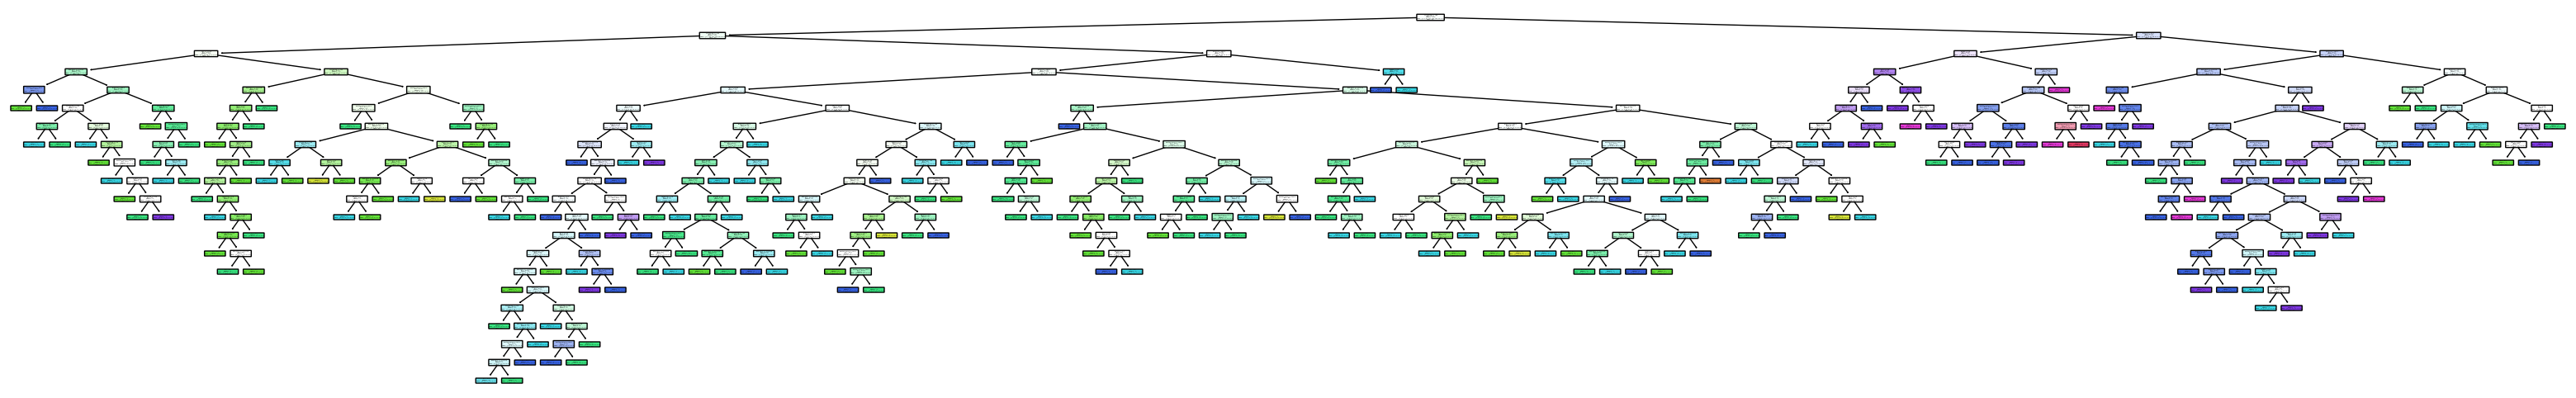

In [326]:
from sklearn.tree import plot_tree
#code here
plt.figure(figsize=(40, 6))  # Adjust the figure size as needed
plot_tree(modified_dt_classifier, feature_names=features, class_names=list(map(str, modified_dt_classifier.classes_)), filled=True, rounded=True)
plt.savefig('decision_tree.png', dpi=600)
plt.show()

In [327]:
y_pred = modified_dt_classifier.predict(x_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.34444444444444444


Accuracy rate is low than I expected.

In [328]:
# code here
def calculate_entropy(data):
  classes, counts = np.unique(data, return_counts=True)
  proportions = counts / len(data)
  entropy = -np.sum(proportions * np.log2(proportions))
  return entropy

def calculate_information_gain(X , y ,feature):
  total_entropy = calculate_entropy(y)
  feature_values , counts = np.unique(X[feature],return_counts=True)
  weighted_avg_entropy = 0

  for value, count in zip(feature_values , counts):
    subset_indices = X[feature] == value
    subset_entropy = calculate_entropy(y[subset_indices])
    weighted_avg_entropy += (count / len(X)) * subset_entropy

  information_gain = total_entropy - weighted_avg_entropy
  return information_gain

information_gains = []
for feature in X.columns:
  information_gain = calculate_information_gain(X, y , feature)
  information_gains.append(information_gain)

first_split_feature_index = np.argmax(information_gains)
print("Information gain of the first split:", information_gains[first_split_feature_index])

Information gain of the first split: 2.4184610773655564


In order to reach better solutions more movies detail can be added such as name of actors. Another improvement can be evaluating the script of each movie, but this is too complex and beyond this project.